# Kaggle: Titanic Challenge

This is my first Kaggle competition that I will be trying out, if I can get into the top 10% that would be great :). 
First I want to run a RandomForestClassifier without any feature engineering and see which score I would get.

In [3]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 4A0E-3ED0

 Directory of D:\Kaggle\Titanic

02/13/2018  02:35 PM    <DIR>          .
02/13/2018  02:35 PM    <DIR>          ..
02/13/2018  02:33 PM    <DIR>          .ipynb_checkpoints
02/13/2018  02:35 PM               803 Untitled.ipynb
               1 File(s)            803 bytes
               3 Dir(s)  18,920,124,416 bytes free


In [4]:
pwd

'D:\\Kaggle\\Titanic'

In [5]:
#the libraries that I'm gonna need
from sklearn.ensemble import RandomForestClassifier
from fastai.imports import * #this includes a couple other things like Pandas and Numpy
from fastai.structured import *
from sklearn import metrics #the evaluation metric for this competition is Accuracy

In [236]:
%matplotlib inline

In [13]:
PATH = 'D:\\Kaggle\\Titanic\\Data\\'

In [15]:
trn = pd.read_csv(f'{PATH}train.csv')
test = pd.read_csv(f'{PATH}test.csv')

In [17]:
trn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
len(trn)

891

In [37]:
trn.isnull().sum().sort_values(ascending=False)/len(trn)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

So, about 77% of the Cabin data is missing as well as 19% of age data.

In [39]:
trn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
trn_x = trn.drop('Survived', axis=1)
trn_y = trn.Survived

In [43]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [44]:
trn_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train_cats(trn_x)

In [59]:
train_cats(trn)

In [60]:
trn_x, trn_y, nas = proc_df(trn, 'Survived')

In [62]:
nas

{'Age': 28.0}

In [63]:
trn_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,False
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,False
2,3,3,354,1,26.0,0,0,670,7.9250,0,3,False
3,4,1,273,1,35.0,1,0,50,53.1000,56,3,False
4,5,3,16,2,35.0,0,0,473,8.0500,0,3,False


In [64]:
m = RandomForestClassifier(n_jobs=-1)

In [65]:
m.fit(trn_x, trn_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
m.score(trn_x, trn_y)

0.98316498316498313

Ok, so for now everythin seems ok. So the following are the steps that I am gonna take now:
1. Just use the model that I have so far on the Test set and check my position on the Leaderboard.
2. Create a validation set and then try to improve my model.

In [72]:
apply_cats(test, trn)

In [87]:
test['Survived'] = 1

In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,NaN,7.8292,NaN,Q,1
1,893,3,NaN,female,47.0,1,0,NaN,7.0000,NaN,S,1
2,894,2,NaN,male,62.0,0,0,NaN,9.6875,NaN,Q,1
3,895,3,NaN,male,27.0,0,0,NaN,8.6625,NaN,S,1
4,896,3,NaN,female,22.0,1,1,3101298,12.2875,NaN,S,1


In [89]:
test_x, _, nas = proc_df(test, 'Survived', na_dict=nas)

In [92]:
test_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Fare_na
0,892,3,434,2,34.5,0,0,0,7.8292,0,2,False,False
1,893,3,0,1,47.0,1,0,0,7.0000,0,3,False,False
2,894,2,0,2,62.0,0,0,0,9.6875,0,2,False,False
3,895,3,0,2,27.0,0,0,0,8.6625,0,3,False,False
4,896,3,0,1,22.0,1,1,252,12.2875,0,3,False,False


In [95]:
preds = m.predict(test_x.drop('Fare_na', axis=1))

In [96]:
len(preds), len(test_x)

(418, 418)

In [100]:
df = pd.DataFrame(test_x.PassengerId, 'Survived'= preds)

SyntaxError: keyword can't be an expression (<ipython-input-100-90bb5920b9ed>, line 1)

In [99]:
preds

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 

In [107]:
df = pd.DataFrame(data = preds, columns=['Survived'])

In [105]:
df.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [115]:
df['PassengerId'] = test_x.PassengerId

In [119]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
df = df[['PassengerId', 'Survived']]

In [121]:
df.to_csv(f'{PATH}submission.csv')

Hahahahahahahaha!!!!!!; I'm in the bottom 20% of the competition', will need to improve on this.

But it's fine, the next step is to split the train data set into train and validation sets.

## Second Phase

In [122]:
from sklearn.model_selection import train_test_split

In [266]:
trn = pd.read_csv(f'{PATH}train.csv')
test = pd.read_csv(f'{PATH}test.csv')

In [125]:
?train_test_split

In [126]:
trn, val = train_test_split(trn)

In [127]:
len(trn), len(val)

(668, 223)

In [129]:
trn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.500,E77,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.100,NaN,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.550,E38,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.750,NaN,S


From what I am seeing here, Name, PassengerId, Cabin and Ticket do not seem to be important, but this will have to be verified by checking the variable importance. Also remember that a lot of the Cabin values are missing.

In [134]:
(100*trn.Ticket.value_counts().sort_values(ascending=False)/len(trn)).head()

3101295     0.748503
347082      0.748503
347088      0.598802
LINE        0.598802
PC 17757    0.598802
Name: Ticket, dtype: float64

In [135]:
trn.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [138]:
train_cats(trn)

In [140]:
trn.dtypes #now the string variables have been converted to categories...

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [141]:
apply_cats(val, trn) #applying the same cats to the validation set

In [154]:
trn_x, trn_y, nas = proc_df(trn, 'Survived')

In [155]:
trn_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
772,773,2,377,1,57.0,0,0,486,10.500,110,3,False
431,432,3,609,1,29.0,1,0,375,16.100,0,3,True
456,457,1,402,2,65.0,0,0,59,26.550,101,3,False
93,94,3,159,2,26.0,1,2,429,20.575,0,3,False
276,277,3,366,1,45.0,0,0,264,7.750,0,3,False


In [156]:
#now applying the same imputation to the dummy and imputations to the Validation set
val_x, val_y, _ = proc_df(val, 'Survived', na_dict=nas)

In [157]:
val_x.shape, trn_x.shape

((223, 12), (668, 12))

In [158]:
val_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
118,119,1,0,2,24.0,0,1,460,247.5208,32,1,False
710,711,1,0,1,24.0,0,0,0,49.5042,0,1,False
382,383,3,0,2,32.0,0,0,0,7.9250,0,3,False
161,162,2,0,1,40.0,0,0,0,15.7500,0,3,False
145,146,2,0,2,19.0,1,1,437,36.7500,0,3,False


In [242]:
m = RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, n_estimators=50, max_features='sqrt')

In [243]:
m.fit(trn_x, trn_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [244]:
preds = m.predict(val_x)

In [162]:
(preds == val_y).sum()/len(val_y)

0.7847533632286996

In [166]:
(preds == val_y).sum()/len(val_y)

0.77578475336322872

In [170]:
(preds == val_y).sum()/len(val_y)

0.78923766816143492

In [174]:
(preds == val_y).sum()/len(val_y) #max features=0.5

0.80269058295964124

In [245]:
(preds == val_y).sum()/len(val_y)

0.78923766816143492

### Feature importance

Now I'm gonna try to use feature importance to eliminate some useless variables, lol.

In [232]:
fi = rf_feat_importance(m, trn_x)

In [233]:
fi[:10]

,cols,imp
3,Sex,0.371397
1,Pclass,0.131594
8,Fare,0.106567
7,Ticket,0.100719
9,Cabin,0.077665
4,Age,0.060910
0,PassengerId,0.042734
2,Name,0.038618
6,Parch,0.029603
10,Embarked,0.020804


In [234]:
fi

,cols,imp
3,Sex,0.371397
1,Pclass,0.131594
8,Fare,0.106567
7,Ticket,0.100719
9,Cabin,0.077665
4,Age,0.060910
0,PassengerId,0.042734
2,Name,0.038618
6,Parch,0.029603
10,Embarked,0.020804


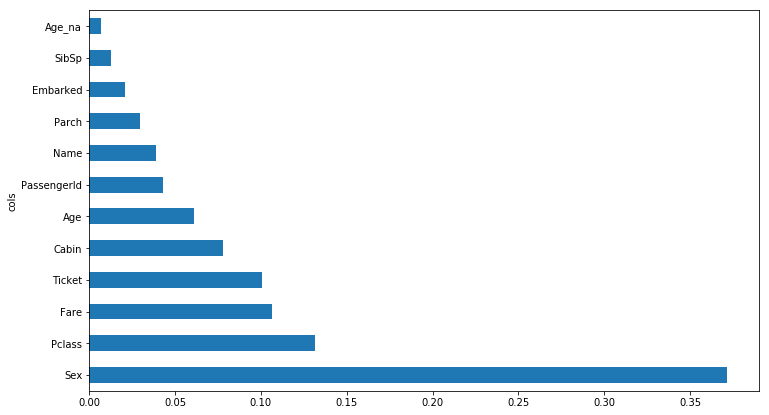

In [237]:
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

Seems like Sex was the greatest determinant to survival on the Titanic.

### Checking for Colinearity

Gonna be using a dendogram for this.

In [247]:
from scipy.cluster import hierarchy as hc

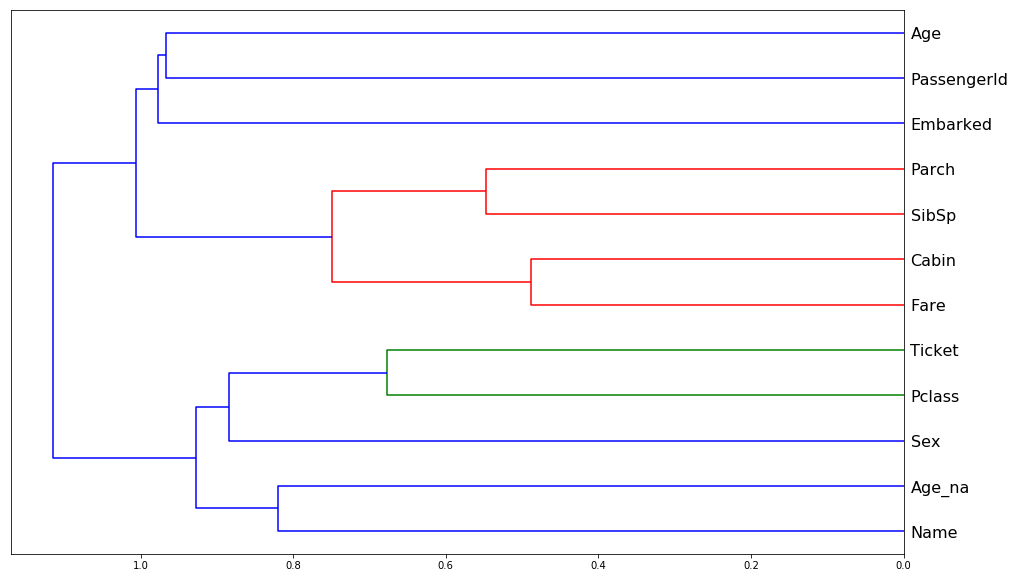

In [248]:
corr = np.round(scipy.stats.spearmanr(trn_x).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=trn_x.columns, orientation='left', leaf_font_size=16)
plt.show()

Seems there isn't much colinearity going on here, maybe Cabin vs Fare and Parch vs SibSp

lol: how is name being treated here, lemme try and see:

In [250]:
trn_x.Name.head()

772    377
431    609
456    402
93     159
276    366
Name: Name, dtype: int16

In [251]:
trn.Name.head()

772                                    Mack, Mrs. (Mary)
431    Thorneycroft, Mrs. Percival (Florence Kate White)
456                            Millet, Mr. Francis Davis
93                               Dean, Mr. Bertram Frank
276                    Lindblom, Miss. Augusta Charlotta
Name: Name, dtype: category
Categories (668, object): [Abbing, Mr. Anthony < Abbott, Mr. Rossmore Edward < Abbott, Mrs. Stanton (Rosa Hunt) < Abelson, Mr. Samuel ... de Pelsmaeker, Mr. Alfons < del Carlo, Mr. Sebastiano < van Billiard, Mr. Austin Blyler < van Melkebeke, Mr. Philemon]

In [263]:
trn.Name.nunique(), len(trn) #so Name as a feature as it is....

(668, 668)

In [269]:
train_cats(trn)

In [272]:
trn2 = trn.drop(['Name', 'PassengerId'], axis=1)

In [274]:
trn2, trny, nas = proc_df(trn2, 'Survived')

In [276]:
trn2_x, val2_x, y_2, val2_y = train_test_split(trn2, trny, random_state=1)

In [333]:
m = RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, n_estimators=200, max_features='sqrt')

In [334]:
m.fit(trn2_x, y_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [335]:
preds = m.predict(val2_x)

In [336]:
(preds == val2_y).sum()/len(val2_y)

0.80717488789237668

## this is for the second submission

1. Drop PassengerId, Name and Ticket from the dataframe
2. train_cats, proc_df
3. Train the model with 200 trees, min_sample_leaf-5, max_features-'srqt'
4. Get the predictions and make the submission to Kaggle.

In [386]:
train_data = pd.read_csv(f'{PATH}train.csv')
test_data = pd.read_csv(f'{PATH}test.csv')

In [374]:
train_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [375]:
train_cats(train_data)

In [376]:
apply_cats(test_data, train_data)

In [377]:
X, y, nas = proc_df(train_data, 'Survived')

In [378]:
X.columns.get_values()

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Age_na'], dtype=object)

In [379]:
test_data['Survived'] = 1

In [380]:
X_test, _, _ = proc_df(test_data, 'Survived', na_dict=nas)

In [381]:
X_test.columns.get_values()

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Age_na', 'Fare_na'], dtype=object)

In [382]:
X_test.drop('Fare_na', axis=1, inplace=True)

In [383]:
m = RandomForestClassifier(n_estimators=200, max_features='sqrt', min_samples_leaf=5)

In [384]:
m.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [385]:
preds = m.predict(X_test)

In [387]:
submit = pd.DataFrame(data = preds, index=test_data.PassengerId, columns=['Survived'])

In [388]:
submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [389]:
submit.to_csv(f'{PATH}submit2.csv')

# hahahahahahahaha {evil laugh}; I am now in the top 50%

So it seems as though a lot of people are using Title and family size for generating features; I will try that now and see how it goes.

## Now for the third submission

For this one I am gonna use the title of the name; :) feature engineering.

In [449]:
train_data = pd.read_csv(f'{PATH}train.csv')
test_data = pd.read_csv(f'{PATH}test.csv')

In [450]:
train_data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

So it seems for every name there is a title, in between the comma and the fullstop; I will now have to exploit that.

In [451]:
train_data['Title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [452]:
train_data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Jonkheer          1
Mme               1
Ms                1
the Countess      1
Lady              1
Capt              1
Don               1
Name: Title, dtype: int64

In [453]:
train_data[train_data['Name'].str.contains('Mlle')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


lol, there is actually a title called 'Jonkheer' - apparently well respected, high up there.

In [454]:
test_data['Title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [455]:
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

No Dona in the training data; that is one thing that I have to read on; ->>what if the test set contains values(mainly Categories) that have not been encountred in the training data set.

In [456]:
train_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [457]:
#here I want to temporarily concatinate the train; ignore this for now

In [458]:
train_cats(train_data)
apply_cats(test_data, train_data)

In [459]:
#check the mapping for train test items
train_data.Title.cat.categories

Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object')

In [460]:
test_data.Title.cat.categories

Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object')

In [441]:
??apply_cats

In [467]:
test_data.Title.value_counts()

Mr              240
Miss             78
Mrs              72
Master           21
Rev               2
Col               2
Ms                1
Dr                1
Lady              0
Don               0
Jonkheer          0
the Countess      0
Major             0
Sir               0
Mlle              0
Mme               0
Capt              0
Name: Title, dtype: int64

1

In [469]:
X, y, nas = proc_df(train_data, 'Survived')

In [470]:
X.columns.get_values()

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title', 'Age_na'], dtype=object)

In [471]:
test_data['Survived'] = 1

In [472]:
X_test, _, _ = proc_df(test_data, 'Survived', na_dict=nas)

In [473]:
X_test.columns.get_values()

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title', 'Age_na', 'Fare_na'], dtype=object)

In [474]:
X_test.iloc[30]

Pclass          2
Sex             2
Age            50
SibSp           1
Parch           0
Fare           26
Cabin           0
Embarked        3
Title          12
Age_na      False
Fare_na     False
Name: 30, dtype: object

In [475]:
X_test.drop('Fare_na', axis=1, inplace=True)

In [476]:
m = RandomForestClassifier(n_estimators=200, max_features='sqrt', min_samples_leaf=5)

In [477]:
m.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [478]:
preds = m.predict(X_test)

In [481]:
test_data = pd.read_csv(f'{PATH}test.csv')
submit = pd.DataFrame(data = preds, index=test_data.PassengerId, columns=['Survived'])

In [482]:
submit.to_csv(f'{PATH}submit3.csv')

# I think I will stop for now, I am now in the top 12% of the competition, 2% shy of my initial target.

I probably am in the top 10% but the problem is there are a lot of other guy's ahead of me who have the same score.